Using sklearn, 
- [ ] apply a stratified 70-30 training-testing split with a fixed seed (random_state=1), 
- [ ] assess in a single plot the training and testing accuracies of a decision tree with no depth limits (and remaining default behavior) 
- [ ] for a varying number of selected features in {5,10,40,100,250,700}. 
- [ ] Feature selection should be performed before decision tree learning considering the discriminative power of the input variables according to mutual information criterion (mutual_info_classif).

In [14]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df = df.dropna()
df['class'] = df['class'].str.decode('utf-8')

X=df.drop('class', axis=1)
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2, SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=1)

selected_features =  [5, 10, 40, 100, 250, 700]
train_accuracies = []
test_accuracies = []

def classifier_func(X, y):
        return mutual_info_classif(X, y, random_state=1)

for feature in selected_features:
        mutual_info = SelectKBest(classifier_func, k=feature)
        mutual_info.fit(X_train, y_train)
        X_train_selected = mutual_info.transform(X_train)
        X_test_selected = mutual_info.transform(X_test)

        # Train decision tree
        clf = DecisionTreeClassifier(random_state=1)
        clf.fit(X_train_selected, y_train)

        # Predict
        y_train_predict = clf.predict(X_train_selected)
        y_test_predict = clf.predict(X_test_selected)

        # Compute accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

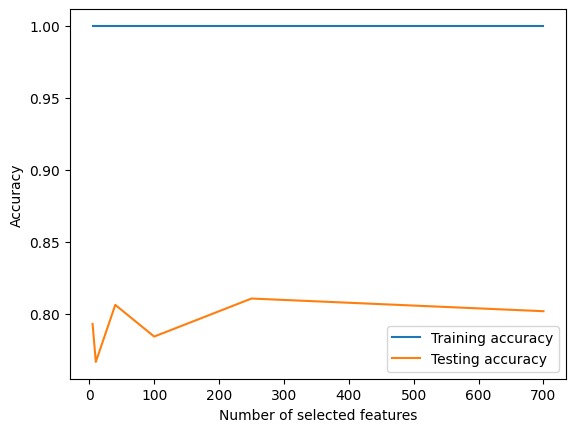

In [16]:
import matplotlib.pyplot as plt

plt.plot(selected_features, train_accuracies, label="Training accuracy")
plt.plot(selected_features, test_accuracies, label="Testing accuracy")
plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()